In [323]:
%matplotlib notebook

In [324]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn import datasets

In [325]:
# File to Load (Remember to Change These)
file_to_load = "Resources/countries of the world.csv"

# Read Purchasing File and store into Pandas data frame
country_data = pd.read_csv(file_to_load)

In [326]:
country_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [327]:
df = country_data.dropna()

In [328]:
df["Infant mortality (per 1000 births)"] = df["Infant mortality (per 1000 births)"].str.replace(',', ".")
df["Pop. Density (per sq. mi.)"] = df["Pop. Density (per sq. mi.)"].str.replace(',', ".")


C:\Users\Aimee\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aimee\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [329]:
x_values = df["Infant mortality (per 1000 births)"].astype(float)
x_values

0      163.07
1       21.52
2       31.00
6       21.03
7       19.46
        ...  
218     22.20
219     25.95
224     61.50
225     88.29
226     67.69
Name: Infant mortality (per 1000 births), Length: 179, dtype: float64

In [330]:
y_values = df["Pop. Density (per sq. mi.)"].astype(float)
y_values

0       48.0
1      124.6
2       13.8
6      132.1
7      156.0
       ...  
218     28.2
219    256.1
224     40.6
225     15.3
226     31.3
Name: Pop. Density (per sq. mi.), Length: 179, dtype: float64

In [331]:
df.sort_values(by=['Pop. Density (per sq. mi.)']).tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
77,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,"0,23","-0,64",51.43,2200.0,"74,8","14,4","16,26","9,67","74,07",2,"30,52","9,72","0,366","0,246","0,387"
168,Romania,EASTERN EUROPE,22303552,237500,93.9,"0,09","-0,13",26.43,7000.0,"98,4","196,9","40,82","2,25","56,93",3,"10,7","11,77","0,101","0,35","0,549"
12,Austria,WESTERN EUROPE,8192880,83870,97.7,"0,00",2,4.66,30000.0,"98,0","452,2","16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678"
202,Togo,SUB-SAHARAN AFRICA,5548702,56785,97.7,"0,10",0,66.61,1500.0,"60,9","10,6","46,15","2,21","51,64",2,"37,01","9,83","0,395","0,204","0,401"
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,"0,00","-6,47",23.28,3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [333]:
x = df["Infant mortality (per 1000 births)"].values.reshape(-1,1)
y = df["Pop. Density (per sq. mi.)"].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 512.16 + -5.5877X


<IPython.core.display.Javascript object>


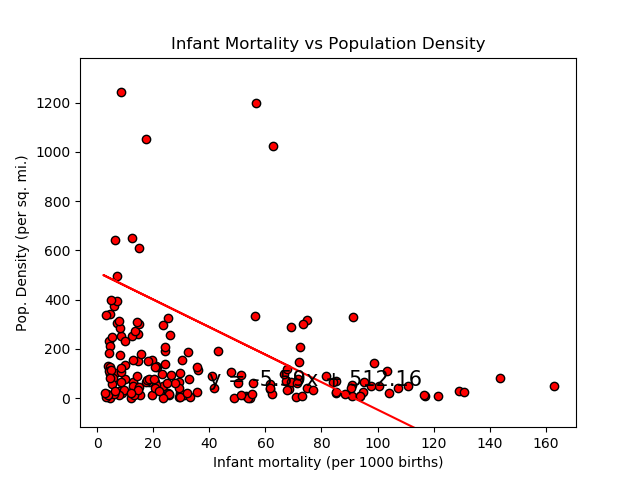

In [354]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.plot(figsize=(100,500))
plt.ylim(0,1500)
plt.annotate(line_eq,(40,50),fontsize=15,color="black")
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Pop. Density (per sq. mi.)")
plt.title("Infant Mortality vs Population Density")
plt.show()

In [360]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = x_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Population density is: {lowerq}")
print(f"The upper quartile of Population density is: {upperq}")
print(f"The interquartile range of Population density is: {iqr}")
print(f"The the median of Population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Population density is: 9.989999999999998
The upper quartile of Population density is: 64.605
The interquartile range of Population density is: 54.61500000000001
The the median of Population density is: 24.31 
Values below -71.93250000000002 could be outliers.
Values above 146.52750000000003 could be outliers.


In [361]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = y_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infant mortality is: {lowerq}")
print(f"The upper quartile of Infant mortality is: {upperq}")
print(f"The interquartile range of Infant mortality is: {iqr}")
print(f"The the median of Infant mortality is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infant mortality is: 26.799999999999997
The upper quartile of Infant mortality is: 164.7
The interquartile range of Infant mortality is: 137.89999999999998
The the median of Infant mortality is: 66.9 
Values below -180.04999999999995 could be outliers.
Values above 371.54999999999995 could be outliers.


In [335]:
infant = df["Infant mortality (per 1000 births)"].astype(float)

In [336]:
pop = df["Pop. Density (per sq. mi.)"].astype(float)

In [337]:
country = df["Country"]

In [338]:
region = df["Region"]

In [339]:
combined_df = pd.DataFrame({"Country": country, "Region": region, "Infant mortality (per 1000 births)": infant, "Pop. Density (per sq. mi.)": pop})

In [340]:
combined_df

,Country,Region,Infant mortality (per 1000 births),Pop. Density (per sq. mi.)
0,Afghanistan,ASIA (EX. NEAR EAST),163.07,48.0
1,Albania,EASTERN EUROPE,21.52,124.6
2,Algeria,NORTHERN AFRICA,31.00,13.8
6,Anguilla,LATIN AMER. & CARIB,21.03,132.1
7,Antigua & Barbuda,LATIN AMER. & CARIB,19.46,156.0
...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,22.20,28.2
219,Vietnam,ASIA (EX. NEAR EAST),25.95,256.1
224,Yemen,NEAR EAST,61.50,40.6
225,Zambia,SUB-SAHARAN AFRICA,88.29,15.3


In [341]:
new_df_grouped = combined_df.groupby(["Region"]).sum()
new_df_grouped.head()

,Infant mortality (per 1000 births),Pop. Density (per sq. mi.)
Region,,
ASIA (EX. NEAR EAST),1055.45,35152.1
BALTICS,17.42,64.5
C.W. OF IND. STATES,477.11,540.1
EASTERN EUROPE,89.51,645.5
LATIN AMER. & CARIB,873.12,5930.5


In [342]:
plt.scatter(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"], marker="o", facecolors="red", edgecolors="black")
plt.show()

<IPython.core.display.Javascript object>


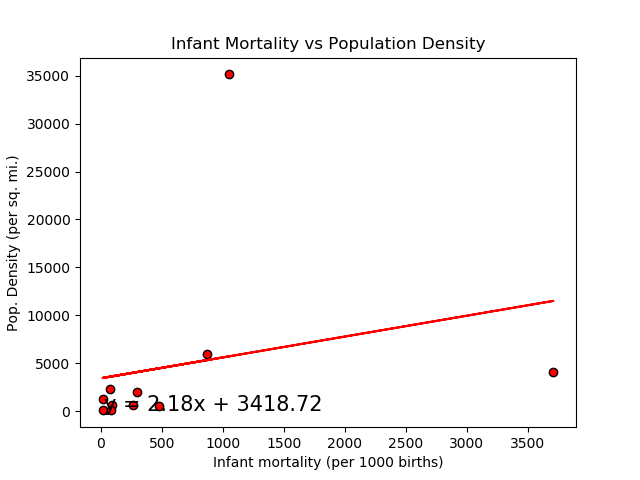

In [347]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"])
regress_values = new_df_grouped["Infant mortality (per 1000 births)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(new_df_grouped["Infant mortality (per 1000 births)"],regress_values,"r-")
plt.annotate(line_eq,(30,35),fontsize=15,color="black")
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Pop. Density (per sq. mi.)")
plt.title("Infant Mortality vs Population Density")
plt.show()

In [358]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = new_df_grouped["Pop. Density (per sq. mi.)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Population density is: {lowerq}")
print(f"The upper quartile of Population density is: {upperq}")
print(f"The interquartile range of Population density is: {iqr}")
print(f"The the median of Population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Population density is: 565.8000000000001
The upper quartile of Population density is: 3215.899999999999
The interquartile range of Population density is: 2650.099999999999
The the median of Population density is: 1272.0 
Values below -3409.3499999999985 could be outliers.
Values above 7191.049999999997 could be outliers.


In [359]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = new_df_grouped["Infant mortality (per 1000 births)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infant mortality is: {lowerq}")
print(f"The upper quartile of Infant mortality is: {upperq}")
print(f"The interquartile range of Infant mortality is: {iqr}")
print(f"The the median of Infant mortality is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infant mortality is: 81.85499999999999
The upper quartile of Infant mortality is: 675.115
The interquartile range of Infant mortality is: 593.26
The the median of Infant mortality is: 260.76 
Values below -808.035 could be outliers.
Values above 1565.005 could be outliers.
